Question 1- Linear Regression

In [3]:
#importing file to colab

from google.colab import files
uploaded = files.upload()

Saving VideoGameDataset.csv to VideoGameDataset.csv


In [4]:
#Import libraries

import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import cross_val_predict
from keras.models import Sequential
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [5]:
#read the csv file
df = pd.read_csv('VideoGameDataset.csv')
df.head() #overview of raw data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Data Preprocessing:

The goal is to use critic scores and user scores given to a video game to predict the global sales for that game.

In [6]:
#extract only the required 3 columns
df = df.loc[:, df.columns.intersection(['Critic_Score','User_Score','Global_Sales'])]

#arranging the columns (1st two are features and last column is the target)
df = df[['Critic_Score','User_Score','Global_Sales']]
df.head()

,Critic_Score,User_Score,Global_Sales
0,76.0,8,82.53
1,NaN,NaN,40.24
2,82.0,8.3,35.52
3,80.0,8,32.77
4,NaN,NaN,31.37


In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Critic_Score  8137 non-null   float64
 1   User_Score    10015 non-null  object 
 2   Global_Sales  16719 non-null  float64
dtypes: float64(2), object(1)
memory usage: 392.0+ KB


In [8]:
df.describe()

,Critic_Score,Global_Sales
count,8137.000000,16719.000000
mean,68.967679,0.533543
std,13.938165,1.547935
min,13.000000,0.010000
25%,60.000000,0.060000
50%,71.000000,0.170000
75%,79.000000,0.470000
max,98.000000,82.530000


In [9]:
#shows missing values
df.isna().sum()

Critic_Score    8582
User_Score      6704
Global_Sales       0
dtype: int64

In [10]:
#To fill missing values

#calculation median of the 3 variables
df.Critic_Score.median()
df['User_Score'] = pd.to_numeric(df['User_Score'],errors='coerce')
df.User_Score.median()
df.Global_Sales.median()

#using a temporary dataframe df1
df1 = df
df1.head()

# Replacing missing values for Critic_Score with the median value
df1.Critic_Score.fillna(df1.Critic_Score.median(), inplace=True)
# Replacing missing values for User_Score with the median value
df1.User_Score.fillna(df1.User_Score.median(), inplace=True)

df1.head()

,Critic_Score,User_Score,Global_Sales
0,76.0,8.0,82.53
1,71.0,7.5,40.24
2,82.0,8.3,35.52
3,80.0,8.0,32.77
4,71.0,7.5,31.37


In [11]:
#defining the features and the labels, X and y resp.
X = df1.drop(['Global_Sales'], axis=1)
y = df1['Global_Sales']
print(X,y)

       Critic_Score  User_Score
0              76.0         8.0
1              71.0         7.5
2              82.0         8.3
3              80.0         8.0
4              71.0         7.5
...             ...         ...
16714          71.0         7.5
16715          71.0         7.5
16716          71.0         7.5
16717          71.0         7.5
16718          71.0         7.5

[16719 rows x 2 columns] 0        82.53
1        40.24
2        35.52
3        32.77
4        31.37
         ...  
16714     0.01
16715     0.01
16716     0.01
16717     0.01
16718     0.01
Name: Global_Sales, Length: 16719, dtype: float64


In [12]:
#scaling the feature dataset X
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#spliting the features and labels/targets into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (13375, 2) (13375,)
Test set: (3344, 2) (3344,)


#LINEAR REGRESSION 

In [14]:
#Create a linear regression object as regr
regr = linear_model.LinearRegression()

#Train the model using train dataset
regr.fit(X_train, y_train)

#Predictions using the test dataset
y_pred = regr.predict(X_test)

#Printing the coefficients
print('Coefficients: \n', regr.coef_)
#Printing the mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
#Printing the median absolute error
print('Median Absolute Error: %.2f' % median_absolute_error(y_test, y_pred))
#Printing the coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.33323301 -0.08866407]
Mean squared error: 4.03
Median Absolute Error: 0.44
Coefficient of determination: 0.02


K-fold cross validation

In [16]:
# define folds range #user input

folds = range(2,51)

for k in folds:
  kf = KFold(n_splits=k)
  scores = []
  for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      
      scores.append(median_absolute_error(regr.fit(X_train, y_train).predict(X_test), y_test))

  print('> folds=%d, MAE=%.3f' % (k, np.mean(scores)))



> folds=2, MAE=0.642
> folds=3, MAE=0.629
> folds=4, MAE=0.613
> folds=5, MAE=0.597
> folds=6, MAE=0.576
> folds=7, MAE=0.566
> folds=8, MAE=0.561
> folds=9, MAE=0.553
> folds=10, MAE=0.550
> folds=11, MAE=0.545
> folds=12, MAE=0.543
> folds=13, MAE=0.544
> folds=14, MAE=0.549
> folds=15, MAE=0.546
> folds=16, MAE=0.546
> folds=17, MAE=0.542
> folds=18, MAE=0.543
> folds=19, MAE=0.543
> folds=20, MAE=0.545
> folds=21, MAE=0.547
> folds=22, MAE=0.545
> folds=23, MAE=0.546
> folds=24, MAE=0.546
> folds=25, MAE=0.548
> folds=26, MAE=0.546
> folds=27, MAE=0.546
> folds=28, MAE=0.544
> folds=29, MAE=0.549
> folds=30, MAE=0.547
> folds=31, MAE=0.546
> folds=32, MAE=0.545
> folds=33, MAE=0.548
> folds=34, MAE=0.547
> folds=35, MAE=0.546
> folds=36, MAE=0.547
> folds=37, MAE=0.548
> folds=38, MAE=0.549
> folds=39, MAE=0.551
> folds=40, MAE=0.551
> folds=41, MAE=0.550
> folds=42, MAE=0.551
> folds=43, MAE=0.551
> folds=44, MAE=0.550
> folds=45, MAE=0.549
> folds=46, MAE=0.549
> folds=47, MAE=0.

#(a) Choose an appropriate value of K and justify it in your report along with the preprocessing strategy.

#Answer 1(a)- 

Optimum value of k=17, since at this MAE is minimum ie. 0.542


Prepeocessing strategy- 
1- Import libraries

2- read the csv file

3- overview of raw data

4- extract only the required 3 columns

5- arranging the columns (1st two are features and last column is the target)

6- shows missing values

7- To fill missing values

8- calculation median of the 3 variables

9- Replacing missing values for Critic_Score with the median value

10- defining the features and the labels, X and y resp.

11- scaling the feature dataset X

12- spliting the features and labels/targets into train and test data

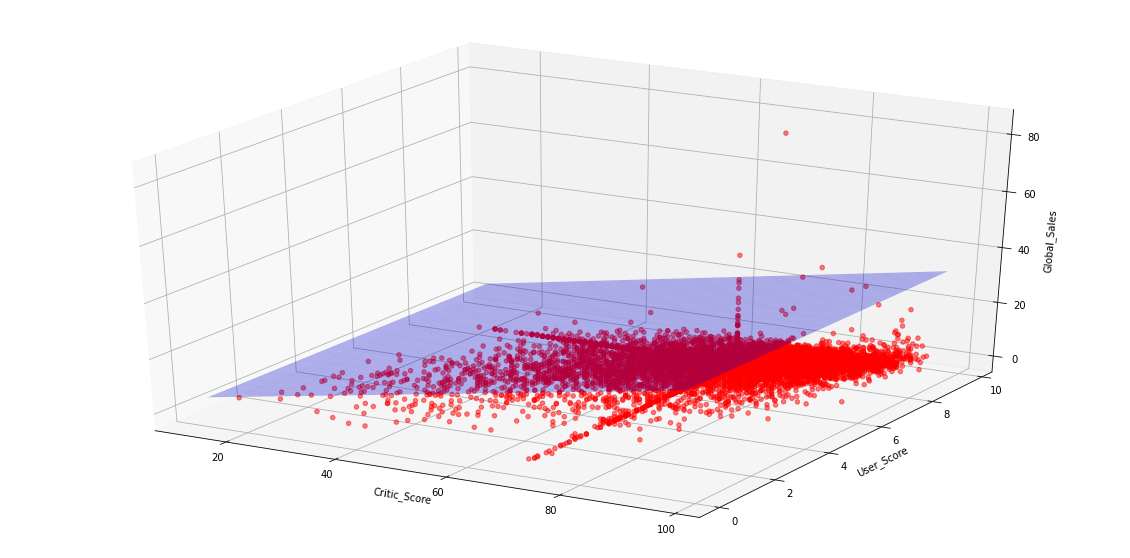

In [17]:
## Prepare the data for Visualization

x_surf, y_surf = np.meshgrid(np.linspace(df1.Critic_Score	.min(), df1.Critic_Score	.max(), 100),np.linspace(df1.User_Score.min(), df1.User_Score.max(), 100))
onlyX = pd.DataFrame({'Critic_Score': x_surf.ravel(), 'User_Score': y_surf.ravel()})
fittedY=regr.predict(onlyX)

## convert the predicted result in an array
fittedY=np.array(fittedY)
fittedY

# Visualize the Data for Multiple Linear Regression
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['Critic_Score'],df1['User_Score'],df1['Global_Sales'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Critic_Score')
ax.set_ylabel('User_Score')
ax.set_zlabel('Global_Sales')
plt.show()

#(b) Include plots between training loss v/s iterations and validation loss v/s iterations. 

In [24]:
#built the neural network architecture
model = Sequential()
model.add(Dense(3, input_dim=2, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2)

Train on 13108 samples, validate on 3277 samples
Epoch 1/500
13108/13108 [==============================] - 1s 43us/sample - loss: 4.2196 - mean_squared_error: 4.2196 - mean_absolute_error: 0.9074 - val_loss: 0.3516 - val_mean_squared_error: 0.3516 - val_mean_absolute_error: 0.3831
Epoch 2/500
13108/13108 [==============================] - 0s 38us/sample - loss: 3.2750 - mean_squared_error: 3.2750 - mean_absolute_error: 0.6677 - val_loss: 0.2970 - val_mean_squared_error: 0.2970 - val_mean_absolute_error: 0.4906
Epoch 3/500
13108/13108 [==============================] - 1s 41us/sample - loss: 3.0115 - mean_squared_error: 3.0115 - mean_absolute_error: 0.6394 - val_loss: 0.3419 - val_mean_squared_error: 0.3419 - val_mean_absolute_error: 0.5674
Epoch 4/500
13108/13108 [==============================] - 1s 41us/sample - loss: 2.8710 - mean_squared_error: 2.8710 - mean_absolute_error: 0.6485 - val_loss: 0.3712 - val_mean_squared_error: 0.3712 - val_mean_absolute_error: 0.5879
Epoch 5/500
131

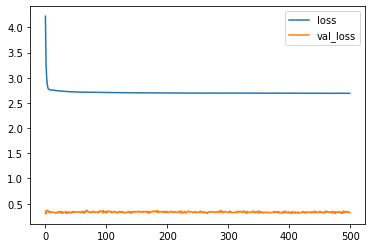

In [26]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

In [27]:
X = df1[['Critic_Score','User_Score']]
y = df1['Global_Sales']

X = np.asarray(X)
y = np.asarray(y)

seed=10

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)
def baseline_model():
    model = Sequential()
    model.add(Dense(2, input_dim=2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=100, verbose=False)
kfold = KFold(n_splits=5, random_state=seed)
results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
print(f'Scores for each fold are: {results}')
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

clf = estimator.fit(X, y)
prediction = estimator.predict(X_test)
#clf.score(y_test, prediction)
#accuracy_score(y, prediction)


Scores for each fold are: [-4.11231939 -1.56748441 -1.65454734 -1.65804909 -3.15520529]
Results: -2.43 (1.03) MSE
